### PRIMER INFORME DE ASTROMETRIA

Baracchi, Marcos.
Gmail: marcos.baracchi@mi.unc.edu.ar

#### **1_Introducción**

En este informe se presenta el método de resolución y los resultados correspondiente a los problemas 16, 17 y 18 de la primera guia de Astrometria 1. 

En este trabajo, estaremos utilizando generadores de congruencia lineal para resolver los problemas dados. Con este método, obtenemos valores pseudoaleatorios. Los generadores congruenciales lineales se considera una combinación lineal de los últimos n enteros generados y se calcula su resto al dividir por un entero fijo M. En el método congruencial simple partiendo de una semilla inicial $ x_0 $, el algoritmo secuencial es el siguiente:  $ x_1 = (a*x_i-1 + c) mod M $ ,donde a (multiplicador), c (incremento) y M (módulo) son enteros positivos fijados de antemano.



#### **2_Datos y Resultados**       

##### **2.1_ Ejercicio 16:** Generador de numeros aleatorios utilizando el metodo de congruencia lineal.  

Vamos a crear un generador con una elección de parametros dadas y vamos a ver que tan buen generador es, pero primero vamos a definir el geneador con parametros indeterminados.

In [1]:
def gene(a,c,M,x0,n):   
    x = []
    for i in range(n):
        r = (a*x0 + c) % M
        x.append(r/M)
        x0 = r
    return(x) 

##### **2.1.1_Generador malo**
Ahora vamos a usar los valores para a,c,M y x0 que nos fueron dados y vamos a ver si existe un periodo en el cual el generador se repita y vamos a analizar si existe una correalcion entre los numeros generados. 

##### **2.1.2_Período**

In [2]:
y= gene(57,1,256,10,1000)
x0=10
i = 0
f = []
for x in y:
    i = i + 1
    if x == x0/256:
        f.append(i)
        print(i,x)
print('Donde el período es:',f[2]-f[1])  

256 0.0390625
512 0.0390625
768 0.0390625
Donde el período es: 256


In [3]:
import matplotlib.pyplot as plt 

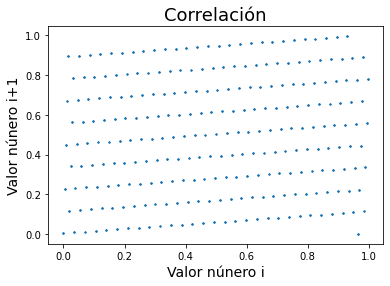

In [4]:
plt.plot(y[:-1],y[1:],'o',ms = 1)
plt.xlabel('Valor núnero i',fontsize = 14)
plt.ylabel('Valor núnero i+1',fontsize = 14)
plt.title('Correlación',fontsize = 18)
plt.show()

Donde vemos que el generador precenta un ciclo de repetición claro y los valores generados estan claramente correlacionados, por lo tanto, este generador no puede ser utilizado para un estudio serio. 

##### **2.1.3_Generador bueno**
Ahora vamos a trabajar con un mejor generador, al cual le vamos a calcular los momentos de orden K = 1, 3 y 7 y vamos a comparar con los esperados con la teoria.

In [5]:
def gene(a,c,M,x0,n):   
    x = []
    for i in range(n):
        r = (a*x0 + c) % M
        x.append(r/M)
        x0 = r
    return(x) 
if __name__ == '__main__':
    x = gene(1664525,1013904223,2**32,10,1000)

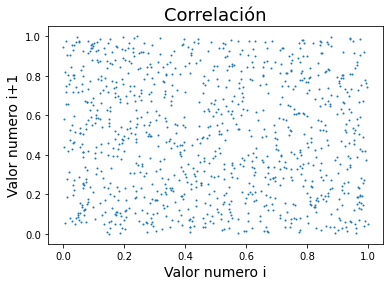

In [6]:
plt.plot(x[:-1],x[1:],'o',ms=1)
plt.xlabel('Valor numero i',fontsize = 14)
plt.ylabel('Valor numero i+1',fontsize = 14)
plt.title('Correlación', fontsize = 18)
plt.show()

##### **2.1.4_Momentos**
Ahora, realicemos un histograma para ver la distribucion de probabilidades

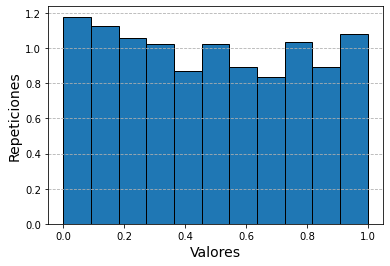

In [7]:
plt.hist(x,edgecolor='black',bins ='auto',density=True)
plt.xlabel('Valores',fontsize = 14)
plt.ylabel('Repeticiones',fontsize = 14)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()

El calculo teórico del momento k de una distribución se realiza la siguente formula:
$  M(x^k) = \int_{-\infty}^{\infty} x^k p(x) dx  $.
Donde en este caso tenemos que todos los valores son igualmente problales, por lo tanto, $  p(x)= cte  $ y ademas tenemos que $ P(x) = \int_{0}^{1} p(x) dx = 1  $ , entonces, tenemos que $  p(x)=1, \forall  x  \in [0,1]  $.

Entonces la integral del momento k nos queda que es:
$  M(x^k) = \int_{0}^{1} x^k dx = 1/(k + 1)   $.
Por lo que tenemos que $ M_1 = 0.5 , M_3 = 0.25 , M_7 = 0.125 $. Ahora determinemos los momentos de la distribución generada.

In [8]:
import numpy as np

In [9]:
x = gene(1664525,1013904223,2**32,10,1000) # el N es la ultima variable
m1=np.mean(np.array(x)) 
m3=np.mean(np.array(x)**3) 
m7=np.mean(np.array(x)**7) 
print('Momento 1=', m1)
print('Momento 3=', m3) 
print('Momento 7=', m7)

Momento 1= 0.4855425436673686
Momento 3= 0.24400701125171065
Momento 7= 0.12478484941415362


Donde se puede ver que si aumentamos la cantidad de numeros generados los momentos de nuestra distibución se aproximan cada vez mas a los teóricos.

##### **2.1.5_Caminata aleatoria**

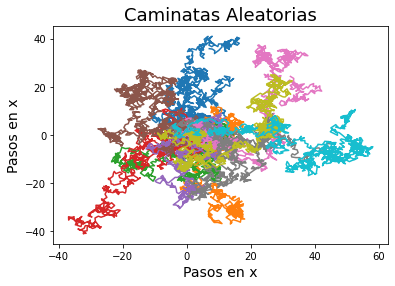

In [10]:
def gene(a,c,M,x0,n):
    x = [] 
    for i in range(n):
        r = (a*x0 + c) % M
        x.append(r/M)
        x0 = r
    return(np.array(x)) 
f = np.arange(1000)
z =  gene(1664525,1013904223,2**32,32,20) #semillas aleatorias
i = 0
j = 0

plt.show()
for j in range(10): # para cambiar los elementos de la semilla q toma    
    dx = gene(1664525,1013904223,2**32,3*z[j],1000)
    dy = gene(1664525,1013904223,2**32,7*z[j+2],1000)

    x = np.cumsum(np.array(dx)*2*np.sqrt(2)-np.sqrt(2))
    y = np.cumsum(np.array(dy)*2*np.sqrt(2)-np.sqrt(2))
        
    plt.plot(x,y) 
plt.title('Caminatas Aleatorias',fontsize = 18)
plt.xlabel('Pasos en x',fontsize = 14)
plt.ylabel('Pasos en x',fontsize = 14)
plt.show()

##### **2.1.6_Valor de expectación de la distancia con respecto al origen de la caminata aleatoria en función del N** 

In [11]:
z =  gene(1664525,1013904223,2**32,32,2000) #semillas aleatorias
j = 0
a = np.zeros((10,1000))
plt.show()
for j in range(10):# para cambiar los elementos de la semilla q toma
    dx = gene(1664525,1013904223,2**32,3*z[j],1000)
    dy = gene(1664525,1013904223,2**32,7*z[j+2],1000)

    x = np.cumsum(np.array(dx)*2*np.sqrt(2)-np.sqrt(2))
    y = np.cumsum(np.array(dy)*2*np.sqrt(2)-np.sqrt(2))
        
    s = np.sqrt(x**2 + y**2)
    a[j,:] = s

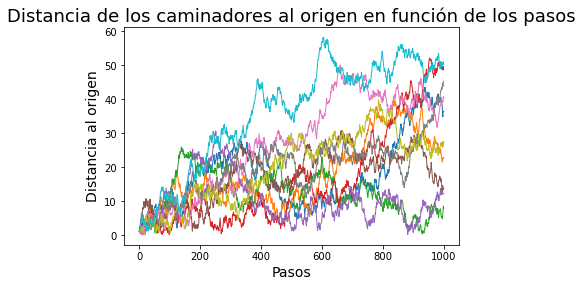

In [12]:
f = np.arange(1000)
for i in range(10):
    plt.plot(f,a[i,:],linewidth = 1)    
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia de los caminadores al origen en función de los pasos',fontsize = 18)
plt.show()

Ahora, si hacemos el promedio de de la distancia a la que se encuentra los caminadores del origen en función de los pasos obtenemos que:

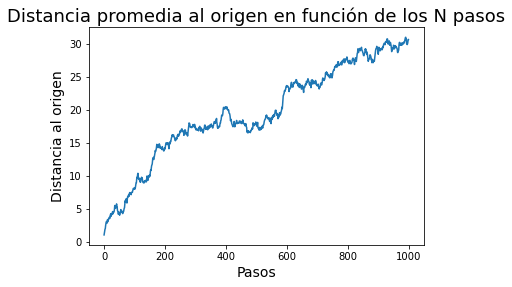

In [13]:
g = a.mean(axis = 0)
plt.plot(g)
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia promedia al origen en función de los N pasos',fontsize = 18)
plt.show()

Ahora, quero graficar la discancia al origen en  función de $ \sqrt N $

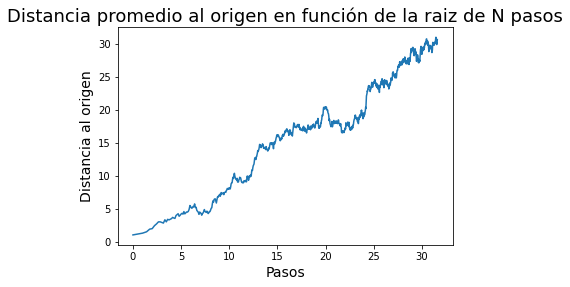

In [14]:
f = np.arange(1000)
plt.plot(np.sqrt(f),g)
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia promedio al origen en función de la raiz de N pasos',fontsize = 18)
plt.show()

En estos 2 últimos grafico vemos que si aumentamos el número de caminantes entonces obtenemos graficos con un menor "ruido".

##### **2.2_ Ejercicio 17:**

En un catalogo de galaxias hay 4 tipos de galaxias, con probabilidades 0.4, 0.3, 0.2, y 0.1 para los tipos
“elíptica”, “espiral”, “enana” e “irregular”, respectivamente. Escriba un programa de python que genere
aleatoriamente tipos de galaxias de tal forma que sigan la distribución dada.

Tengo que tomar un generador aleatorio entre 0 y 1, y que me diga q si esta enntre 0 y 0,4 es eliptica, entre 0,4 y 0,7 sea espiral , entre 0,7 y 0,9 es una enanan y entre 0,9 y 1 irregular.

In [32]:
def gene(a,c,M,x0,n):
	x = [] 
	for i in range(n):
		r = (a*x0 + c) % M
		x.append(r/M)
		x0 = r
	return(x)

if __name__ == '__main__':
    x = gene(1664525,1013904223,2**32,10,1000)
    %time x

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [16]:
import matplotlib.pyplot as plt

In [33]:
elipticas = []
espirales = []
enanas = []
irregulares = []
for i in range(1000):
    if 0. <= x[i] < 0.4:
        elipticas.append(x[i])
    if 0.4 <= x[i] < 0.7:
        espirales.append(x[i])
    if 0.7 <= x[i] < 0.9:
        enanas.append(x[i])
    if 0.9 <= x[i] <= 1:
        irregulares.append(x[i])
y = [len(elipticas)/1000,len(espirales)/1000,len(enanas)/1000,len(irregulares)/1000]        
print(y)
%time

[0.432, 0.271, 0.19, 0.107]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


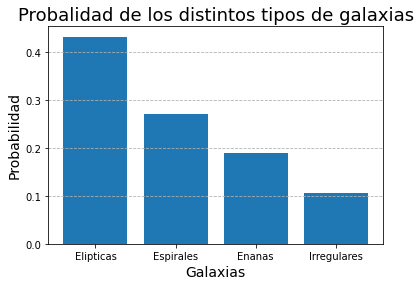

In [18]:
galaxias =('Elipticas', 'Espirales', 'Enanas', 'Irregulares')
plt.bar(galaxias,y)
plt.xlabel('Galaxias',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de los distintos tipos de galaxias',fontsize = 18)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()

##### **2.3_ Ejercicio 18:**

Un experimento aleatorio consiste en arrojar dos dados equilibrados y anotar la suma de los numeros
resultantes en cada uno.


El espacio muestral es el conjunto de todos los posibles resultados (S), y la variable aleatoria (X) en este caso son los valores de la suma de los dados, es decir, de 1 a 12.

In [19]:
s = []
h = []
for j in range(6):
    for i in range(6):
        r = (j+1,i+1)
        m = j + i + 2 
        s.append(r)
        h.append(m)
print('Elementos de S:',len(s))
print('S =',s)
print('X =',h)
#print(len(h))

Elementos de S: 36
S = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
X = [2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


##### **2.3.1_ Teorico:**

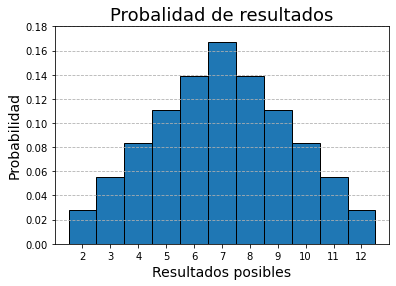

In [20]:
plt.hist(h,edgecolor='black',bins= np.arange(1,14)-0.5,density = True)
plt.xlim(1,13)
plt.xticks(range(2,13,1))
plt.ylim(0,0.18)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()

##### **2.3.2_ Generador:**

In [21]:
r = []
for i in range(1000):
    if 0. <= x[i] < 0.0277:
        x[i] = 2
        r.append(x[i])
    if 0.0277 <= x[i] < 0.08325:
        x[i] = 3
        r.append(x[i])
    if 0.08325 <= x[i] < 0.16658:
        x[i] = 4
        r.append(x[i])
    if 0.16658 <= x[i] <= 0.27769:
        x[i] = 5
        r.append(x[i])
    if 0.27769 <= x[i] < 0.41658:
        x[i] = 6
        r.append(x[i])
    if 0.41658 <= x[i] < 0.58325:
        x[i] = 7
        r.append(x[i])
    if 0.58325 <= x[i] < 0.72214:
        x[i] = 8
        r.append(x[i])
    if 0.72214 <= x[i] <= 0.83325:
        x[i] = 9
        r.append(x[i])
    if 0.83325 <= x[i] < 0.91658:
        x[i] = 10
        r.append(x[i])
    if 0.91658 <= x[i] < 0.97213:
        x[i] = 11
        r.append(x[i])
    if 0.97231 <= x[i] <= 1:
        x[i] = 12
        r.append(x[i])

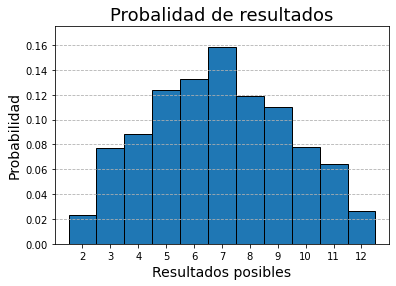

In [22]:
plt.hist(r,edgecolor='black',bins= np.arange(1.,14.)-0.5,density = True)
plt.xlim(1,13)
plt.xticks(range(2,13,1))
plt.ylim(0,0.175)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()

##### **2.3.3_ Experimento:**

In [23]:
x = gene(1664525,1013904223,2**32,10,1000)
dado1 = []
for i in range(1000):
    if 0. <= x[i] < 0.1666:
        x[i] = 1
        dado1.append(x[i])
    if 0.1666 <= x[i] < 0.3333:
        x[i] = 2
        dado1.append(x[i])
    if 0.3333 <= x[i] < 0.5:
        x[i] = 3
        dado1.append(x[i])
    if 0.5 <= x[i] < 0.6666:
        x[i] = 4
        dado1.append(x[i])
    if 0.6666 <= x[i] < 0.8333:
        x[i] = 5
        dado1.append(x[i])
    if 0.8333 <= x[i] < 1:
        x[i] = 6
        dado1.append(x[i])


In [24]:
print(len(dado1))
#print(dado1)

1000


In [25]:
z = gene(1664525,1013904223,2**32,7,1000)
dado2 = []
for i in range(1000):
    if 0. <= z[i] < 0.1666:
        z[i] = 1
        dado2.append(z[i])
    if 0.1666 <= z[i] < 0.3333:
        z[i] = 2
        dado2.append(z[i])
    if 0.3333 <= z[i] < 0.5:
        z[i] = 3
        dado2.append(z[i])
    if 0.5 <= z[i] < 0.6666:
        z[i] = 4
        dado2.append(z[i])
    if 0.6666 <= z[i] < 0.8333:
        z[i] = 5
        dado2.append(z[i])
    if 0.8333 <= z[i] < 1:
        z[i] = 6
        dado2.append(z[i])

In [26]:
print(len(dado2))
#print(dado2)

1000


In [27]:
suma = []
for i in range(1000):
    s = dado1[i] + dado2[i]
    suma.append(s)
#print(suma)

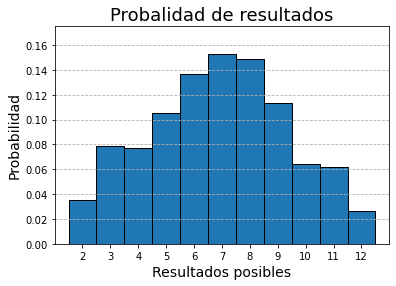

In [28]:
plt.hist(suma,edgecolor='black',bins= np.arange(1.,14.)-0.5,density = True)
plt.xlim(1,13)
plt.xticks(range(2,13,1))
plt.ylim(0,0.175)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()

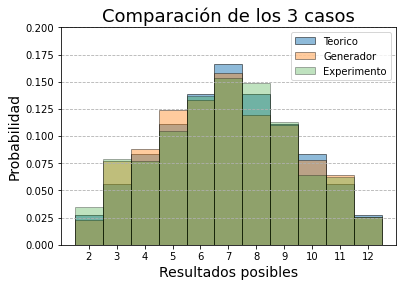

In [31]:
plt.hist(h,edgecolor='black',bins= np.arange(1.,14.)-0.5,density = True,alpha=0.5,label ='Teorico' )#histtype = 'step',lw=3), alpha es la descidad 
plt.hist(r,edgecolor='black',bins= np.arange(1.,14.)-0.5,density = True,alpha=0.4,label='Generador')
plt.hist(suma,edgecolor='black',bins= np.arange(1.,14.)-0.5,density = True,alpha=0.3,label='Experimento')
plt.xlim(1,13)
plt.xticks(range(2,13,1))
plt.ylim(0,0.20)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Comparación de los 3 casos',fontsize = 18)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.legend()
plt.show()

#### **3_ Conclusión**   

En conclusión, el metodo de congruencia lineal para generar numeros aleatorios es dependiente de los parametros que se utilicen para definir la función, es decir, que la correcta elección de parametros es fundamental para el buen funcionamiento del generador. Tambien podemos ver que los resultados de las probabilidades obtenidas estan estrechamente relacionadas con el numero de numeros generados, donde se puede ver que mientras mayor sea la cantidad de numeros generados nuestras distribuciones y resultados se aproximan mas a los esperados en la teoria.


#### **4_ Bibliografía**  

[1] Wikipedia; link: https://es.wikipedia.org/wiki/Generador_lineal_congruencial